In [1]:
import cv2
import pandas as pd
import os
import glob as gb
import random
import subprocess
from tensorflow import keras

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
TRAIN_DIR = "C:\\Users\\yammi\\train"
TEST_DIR = "C:\\Users\\yammi\\test"
BATCH_SIZE=32

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 102 in folder anger
For training data, found 128 in folder disgusting
For training data, found 118 in folder fearer
For training data, found 142 in folder happier
For training data, found 123 in folder sader
For training data, found 134 in folder surprising


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 63 in folder anger
For testing data, found 53 in folder disgusting
For testing data, found 52 in folder fearer
For testing data, found 78 in folder happier
For testing data, found 61 in folder sader
For testing data, found 63 in folder surprising


In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['anger','disgusting','fearer','happier','sader','surprising']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (428, 326, 3)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (364, 251, 3)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


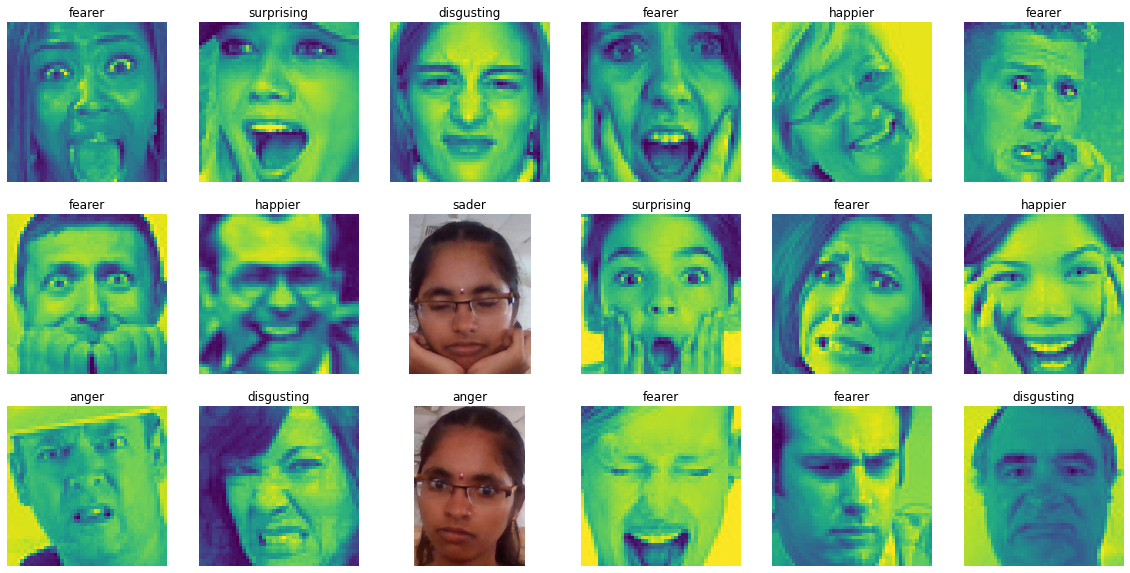

In [9]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="C:\\Users\\yammi\\train\\", target_class=class_name)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 747 images belonging to 6 classes.
Found 370 images belonging to 6 classes.


In [15]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))

classifier.add(Conv2D(256,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))

classifier.add(Flatten())
classifier.add(Dense(512,activation='relu'))
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 6, activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
## model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                  

In [17]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model6.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
24/24 [==============================] - 164s 6s/step - loss: 1.9403 - accuracy: 0.1754 - val_loss: 1.7903 - val_accuracy: 0.2108
Epoch 2/50
24/24 [==============================] - 127s 5s/step - loss: 1.7903 - accuracy: 0.1834 - val_loss: 1.7893 - val_accuracy: 0.1730
Epoch 3/50
24/24 [==============================] - 127s 5s/step - loss: 1.7914 - accuracy: 0.1794 - val_loss: 1.7889 - val_accuracy: 0.2351
Epoch 4/50
24/24 [==============================] - 125s 5s/step - loss: 1.7867 - accuracy: 0.2048 - val_loss: 1.7905 - val_accuracy: 0.2216
Epoch 5/50
24/24 [==============================] - 124s 5s/step - loss: 1.7879 - accuracy: 0.1968 - val_loss: 1.7819 - val_accuracy: 0.2108
Epoch 6/50
24/24 [==============================] - 126s 5s/step - loss: 1.7870 - accuracy: 0.1941 - val_loss: 1.7885 - val_accuracy: 0.2297
Epoch 7/50
24/24 [==============================] - 126s 5s/step - loss: 1.7822 - accuracy: 0.1995 - val_loss: 1.7720 - val_accuracy: 0.2108
Epoch 8/50
24

In [18]:
classifier.evaluate(test_set)

12/12 [==============================] - 20s 1s/step - loss: 2.9662 - accuracy: 0.4838


[2.96620774269104, 0.4837837815284729]

Text(0, 0.5, 'Loss')

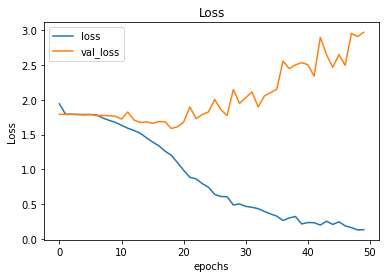

In [19]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

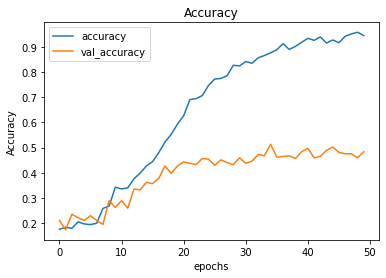

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [11]:
model_path = "model6.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [12]:
camera_port=0    #camera 0 is laptop camera
ramp_frames=30    #30 frames pause before taking a picture to adjust
camera=cv2.VideoCapture(camera_port)  #establishesthe camera

#captures a single image from the camera and return it in PIL format
def get_image():
    retval,im=camera.read()
    return im

for i in range(ramp_frames):
    temp=get_image()
print("Capturing image...")

#takes the picture
camera_capture=get_image()
file='test_image.png'
cv2.imwrite(file, camera_capture)

#releases the camera
del camera
print("picture taken.")

Capturing image...
picture taken.


In [13]:
image = cv2.imread("C:\\Users\\yammi\\test_image.png") 

In [14]:
faceCascade=cv2.CascadeClassifier("C:\\Users\\yammi\\haarcascade_frontalface_alt.xml")
faces=faceCascade.detectMultiScale(image,scaleFactor=1.3,minNeighbors=4,minSize=(30,30))
try:
    os.remove("C:\\Users\\yammi\\face.jpg")
except:
    pass
#cv2.imshow('faces',faces)
#cv2.waitKey()
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    faces=image[y:y+h,x:x+w]
    #cv2.imshow("face",faces)
    cv2.imwrite('face.jpg',faces)
cv2.destroyAllWindows()

In [15]:
image_fromarray = Image.fromarray(image, 'RGB')

In [16]:
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()

1/1 [==============================] - 0s 280ms/step


In [17]:
training_set.class_indices

{'anger': 0,
 'disgusting': 1,
 'fearer': 2,
 'happier': 3,
 'sader': 4,
 'surprising': 5}

In [18]:
mp = 'C:/Program Files (x86)/Windows Media Player/wmplayer.exe'
if result==0:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\anger\\"))
    print("It seems you are 'ANGRY'")
    file=('C:\\Users\\yammi\\Songs\\songs\\anger\\'+randomfile)
    subprocess.call([mp,file])
if result==1:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\disgusting\\") )   
    print("It seems you are 'Disgust'")
    file=('C:\\Users\\yammi\\Songs\\songs\\disgusting\\'+randomfile)
    subprocess.call([mp,file])
if result==2:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\fearer\\"))
    print("It seems you are 'Fear'")
    file=('C:\\Users\\yammi\\Songs\\songs\\fearer\\'+randomfile)
    subprocess.call([mp,file])
if result==3:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\happier\\"))
    print("It seems you are 'Happy'")
    file=('C:\\Users\\yammi\\Songs\\songs\\happier\\'+randomfile)
    subprocess.call([mp,file])
if result==4:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\sader\\"))                           
    print("It seems you are 'Sad'")
    file=('C:\\Users\\yammi\\Songs\\songs\\sader\\'+randomfile)
    subprocess.call([mp,file])
if result==5:
    randomfile = random.choice(os.listdir("C:\\Users\\yammi\\Songs\\songs\\surprising\\"))
    print("It seems you are in 'Surprise'")
    file=('C:\\Users\\yammi\\Songs\\songs\\surprising\\'+randomfile)
    subprocess.call([mp,file])
cv2.destroyAllWindows()

It seems you are 'Happy'
